In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = []
with open('local-results.jsonl') as f:
    for line in f:
        if line.strip():
            data.append(json.loads(line))

In [3]:
all_algorithms = [
    'random_solution',
    'treeGNE', 
    'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    'AOsearchGNE', 
    'OrNE', 
    'BnBOrNE', 
    'BnBOrNEskip'
]

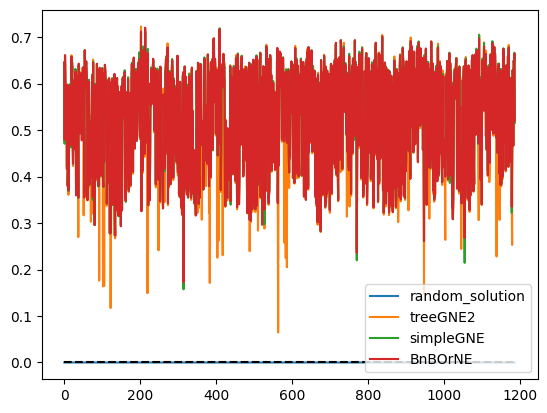

In [4]:
# Create a line chart of the reward for each algorithm at each iteration
algorithms = [
    'random_solution',
    # 'treeGNE', 
    'treeGNE2', 
    # 'fastTreeGNE2', 
    'simpleGNE', 
    # 'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
for algorithm in algorithms:
    arrays = []
    for d in data:
        upper_bound = d['upper_bound']
        arrays.append(d[algorithm]['reward'] / upper_bound - d['random_solution']['reward'] / upper_bound)
    plt.plot(arrays)
plt.legend(algorithms)

# Draw a y=0 line
plt.plot([0, len(data)], [0, 0], 'k--')

In [5]:
# Plot all points
def plot_all(algorithms, x_category='task_num', x_label='task number', y_category='time', y_label='time (s)', flip_y=False):
    all_time = {}
    for d in data:
        task_num = d['info'][x_category]
        for algorithm in algorithms:
            all_time[algorithm] = all_time.get(algorithm, [])
            all_time[algorithm].append({
                x_category: task_num,
                y_category: d[algorithm][y_category]
            })

    for algorithm, arrays in all_time.items():
        arrays = sorted(arrays, key=lambda x: (x[x_category], x[y_category]))
        plt.plot([x[x_category] for x in arrays], [x[y_category] for x in arrays], label=algorithm)

    # Put the legend to the right of the chart
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if flip_y:
        # Flip the y-axis
        plt.gca().invert_yaxis()


In [6]:
# Average reward, group by task_num

def plot_avg_reward(algorithms, group_by='task_num', x_label='task number'):

    all_rewards = {}
    for d in data:
        task_num = d['info'][group_by]
        upper_bound = d['upper_bound']
        for algorithm in algorithms:
            all_rewards[algorithm] = all_rewards.get(algorithm, {})
            all_rewards[algorithm][task_num] = all_rewards[algorithm].get(task_num, [])
            all_rewards[algorithm][task_num].append(d[algorithm]['reward'] / upper_bound)

    for algorithm, arrays in all_rewards.items():
        for task_num, arr in arrays.items():
            arrays[task_num] = np.mean(arr)

    for algorithm, arrays in all_rewards.items():
        # plt.plot(list(arrays.keys()), list(arrays.values()), label=algorithm, marker='o', linestyle='--')
        plt.plot(list(arrays.keys()), list(arrays.values()), label=algorithm, marker='o')
    
    # Put the legend to the right of the chart
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(x_label)
    plt.ylabel('reward / upper')



In [7]:
# Average time, group by task_num

def plot_avg_time(algorithms, group_by = 'task_num', x_label = 'task number', flip_y = False):

    all_time = {}
    for d in data:
        task_num = d['info'][group_by]
        for algorithm in algorithms:
            all_time[algorithm] = all_time.get(algorithm, {})
            all_time[algorithm][task_num] = all_time[algorithm].get(task_num, [])
            all_time[algorithm][task_num].append(d[algorithm]['time'])

    for algorithm, arrays in all_time.items():
        for task_num, arr in arrays.items():
            arrays[task_num] = np.mean(arr)

    for algorithm, arrays in all_time.items():
        # plt.plot(list(arrays.keys()), list(arrays.values()), label=algorithm, marker='o', linestyle='--')
        plt.plot(list(arrays.keys()), list(arrays.values()), label=algorithm, marker='o')


    # Put the legend to the right of the chart
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(x_label)
    plt.ylabel('time (s)')


    if flip_y:
        # Flip the y-axis
        plt.gca().invert_yaxis()

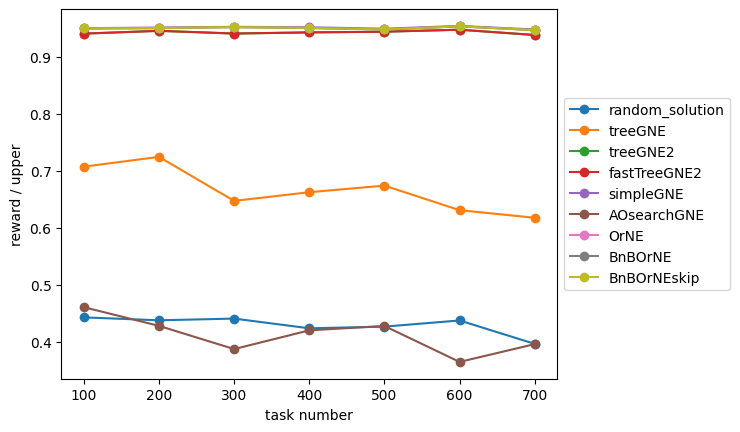

In [8]:
algorithms = [
    # 'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    # 'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_reward(all_algorithms)

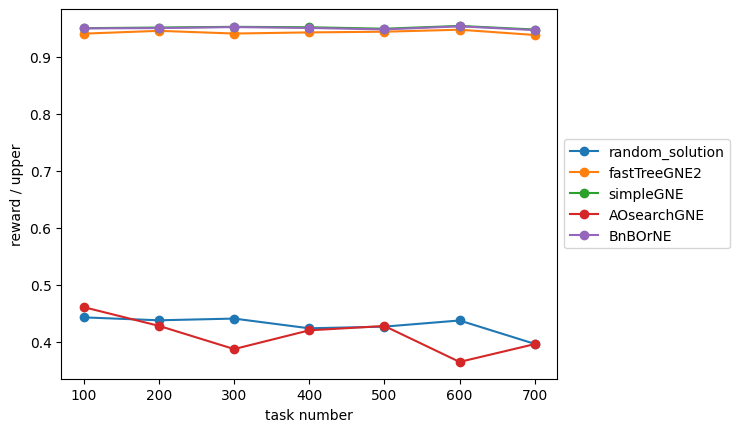

In [9]:
algorithms = [
    'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_reward(algorithms)

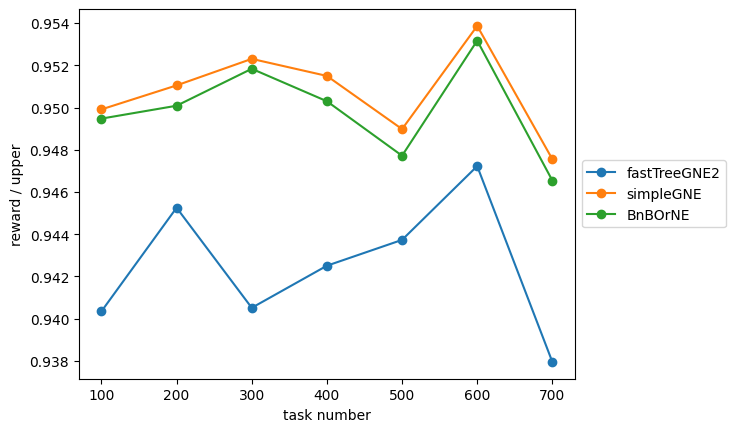

In [10]:
algorithms = [
    # 'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    # 'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_reward(algorithms)


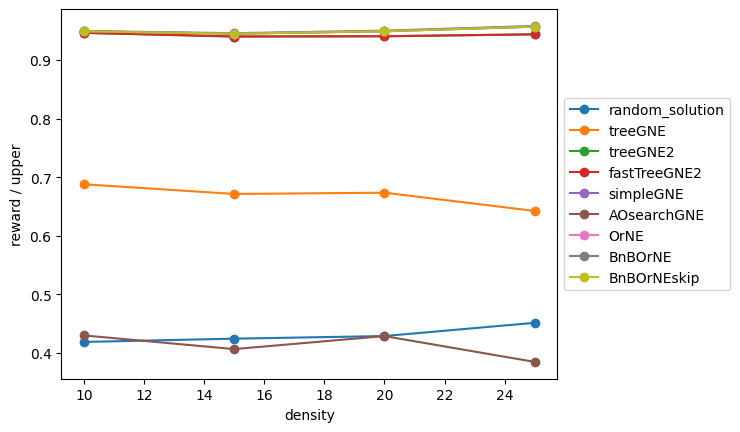

In [11]:
plot_avg_reward(all_algorithms, group_by='t_max_edge', x_label='density')

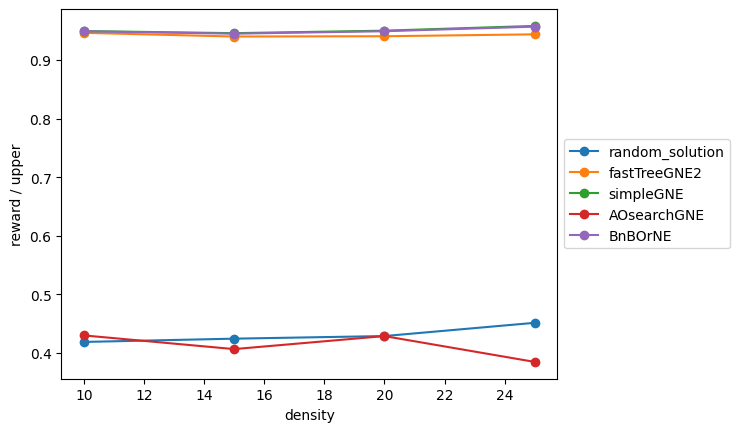

In [12]:
algorithms = [
    'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_reward(algorithms, group_by='t_max_edge', x_label='density')

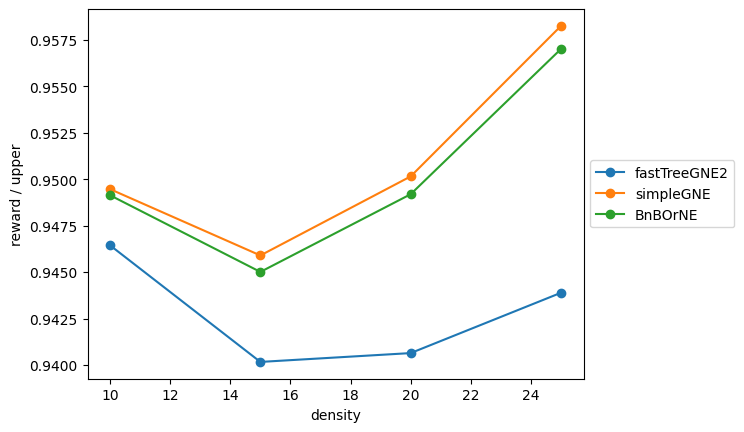

In [13]:
algorithms = [
    # 'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    # 'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_reward(algorithms, group_by='t_max_edge', x_label='density')

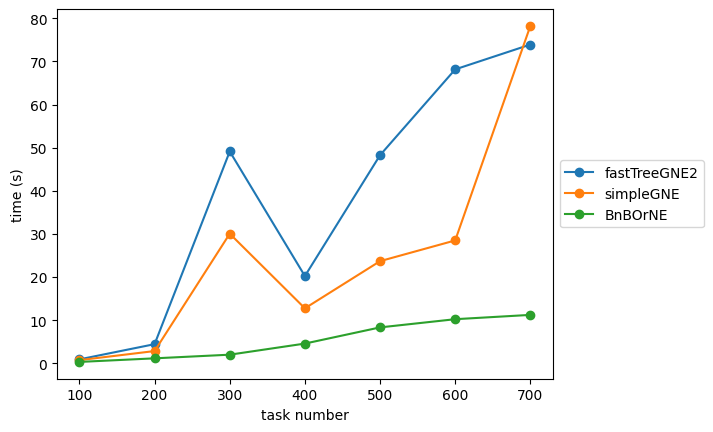

In [14]:
algorithms = [
    # 'random_solution',
    # 'treeGNE', 
    # 'treeGNE2', 
    'fastTreeGNE2', 
    'simpleGNE', 
    # 'AOsearchGNE', 
    # 'OrNE', 
    'BnBOrNE', 
    # 'BnBOrNEskip'
]
plot_avg_time(algorithms)

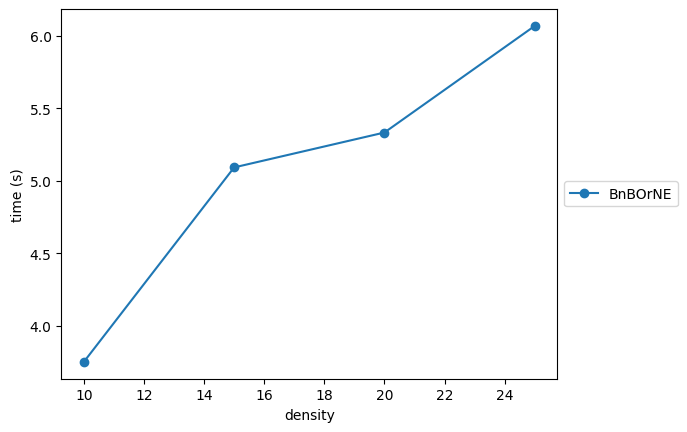

In [15]:
plot_avg_time(['BnBOrNE'], group_by='t_max_edge', x_label='density', flip_y=False)

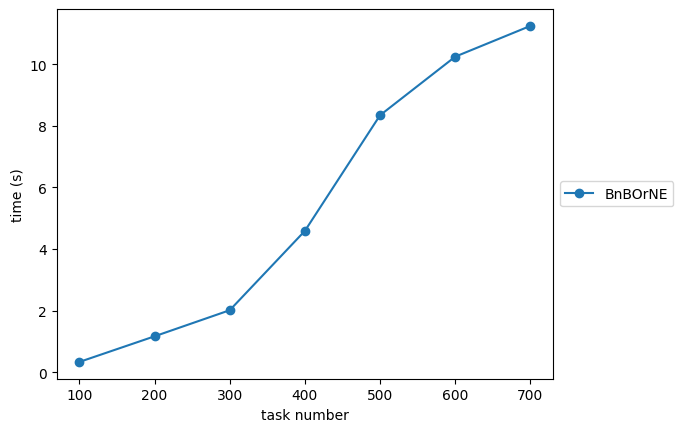

In [16]:
plot_avg_time(['BnBOrNE'], flip_y=False)

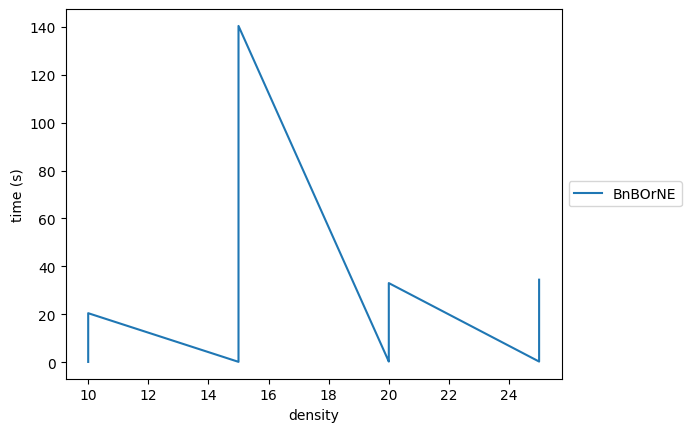

In [17]:
plot_all(['BnBOrNE'], x_category='t_max_edge', x_label='density', y_category='time', y_label='time (s)', flip_y=False)